MNIST handwritten digit classification using neural network


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


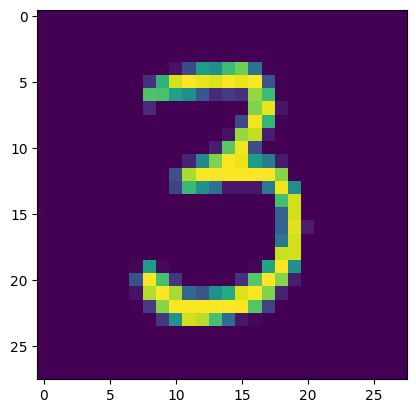

In [6]:
plt.imshow(x_train[50])
plt.show()

In [7]:
print(y_train[50])

3


In [8]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

In [11]:
print(x_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')

                          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']


)

In [14]:
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8425 - loss: 0.5385
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9547 - loss: 0.1511
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1102
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0484
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0412
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0352
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0313


In [15]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9679 - loss: 0.1324


In [16]:
print(x_test.shape)

(10000, 28, 28)


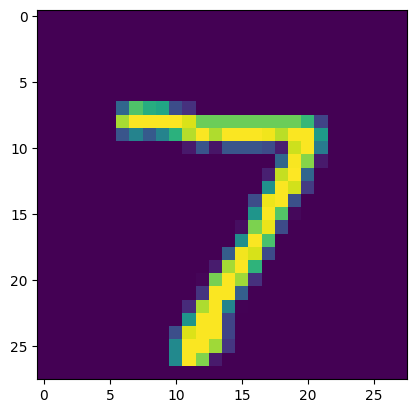

In [17]:
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred  = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
y_pred[0]

array([8.6224661e-04, 2.8033175e-03, 1.4585146e-01, 9.0270710e-01,
       2.3192068e-04, 4.1754767e-02, 6.6799238e-08, 9.9999845e-01,
       3.5923609e-01, 9.8356992e-01], dtype=float32)

In [21]:
#converting the prediction probablities to class labels
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [22]:
#converting the prediction probablities to class labels for all the values
y_pred_labels =[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [23]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 956    0    1    2    3    1    3    0    3   11]
 [   0 1116    3    2    1    0    2    2    9    0]
 [   1    1 1011    7    1    1    1    5    4    0]
 [   1    0    8  980    0    4    1    4    4    8]
 [   1    0    5    0  963    0    0    3    1    9]
 [   1    0    0   16    2  854    4    0   11    4]
 [   4    2    3    2   13    7  924    0    3    0]
 [   1    1   12    1    6    1    0  987    3   16]
 [   2    0    5    9    2    1    2    2  943    8]
 [   1    1    0    3   16    3    1    2    3  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

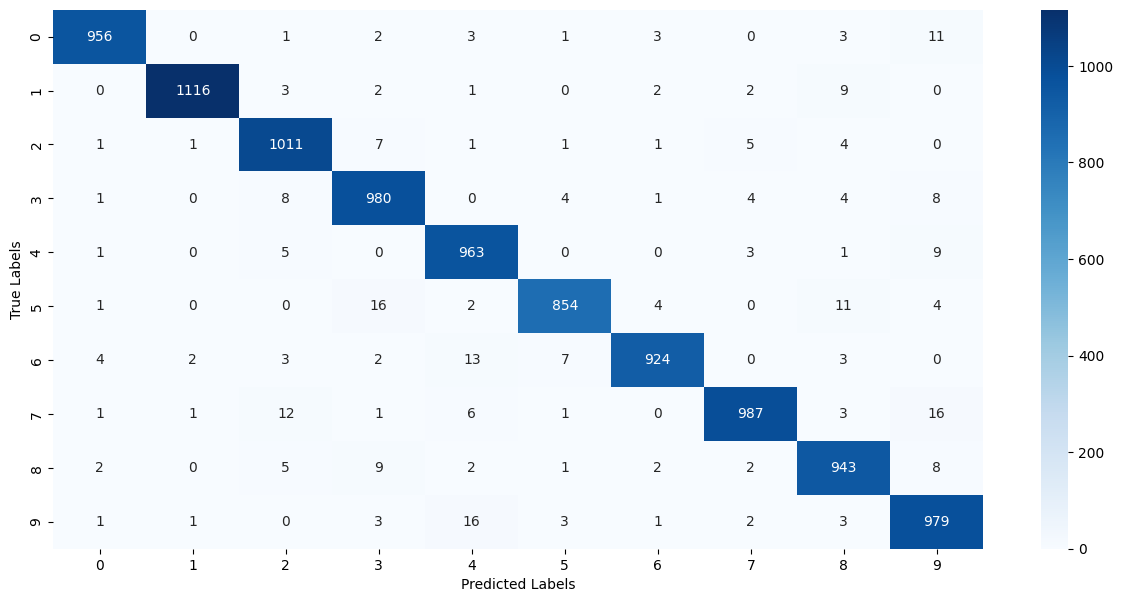

In [25]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [26]:
image_data =  '/content/image12.png'
input_image = cv2.imread(image_data)

In [27]:
type(input_image)

numpy.ndarray

In [28]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [29]:
input_image.shape

(264, 255, 3)

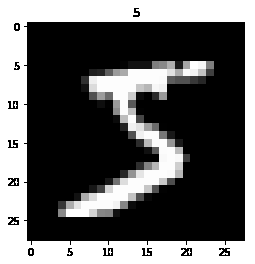

In [30]:
cv2_imshow(input_image)

In [31]:
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [32]:
type(grayscale_image)

numpy.ndarray

In [33]:
grayscale_image.shape

(264, 255)

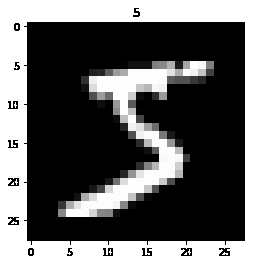

In [34]:
cv2_imshow(grayscale_image)

In [39]:
img_resize = cv2.resize(grayscale_image,(28,28))

In [40]:
cv2_imshow(img_resize)

In [41]:
img_resize = img_resize/255

In [42]:
img_reshaped  = np.reshape(img_resize,[1,28,28])

In [43]:
input_prediction = model.predict(img_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


In [44]:
print(input_prediction)

[[2.4853221e-01 9.9169546e-01 1.0000000e+00 6.1825734e-01 1.4357916e-24
  9.9319004e-07 4.3847855e-17 1.0000000e+00 8.9329434e-13 9.7929994e-03]]


In [45]:
label_for_first_image = np.argmax(input_prediction)
print(label_for_first_image)

2


**Predicting system**

Enter the path of the image to be predicted :  /content/image123.png


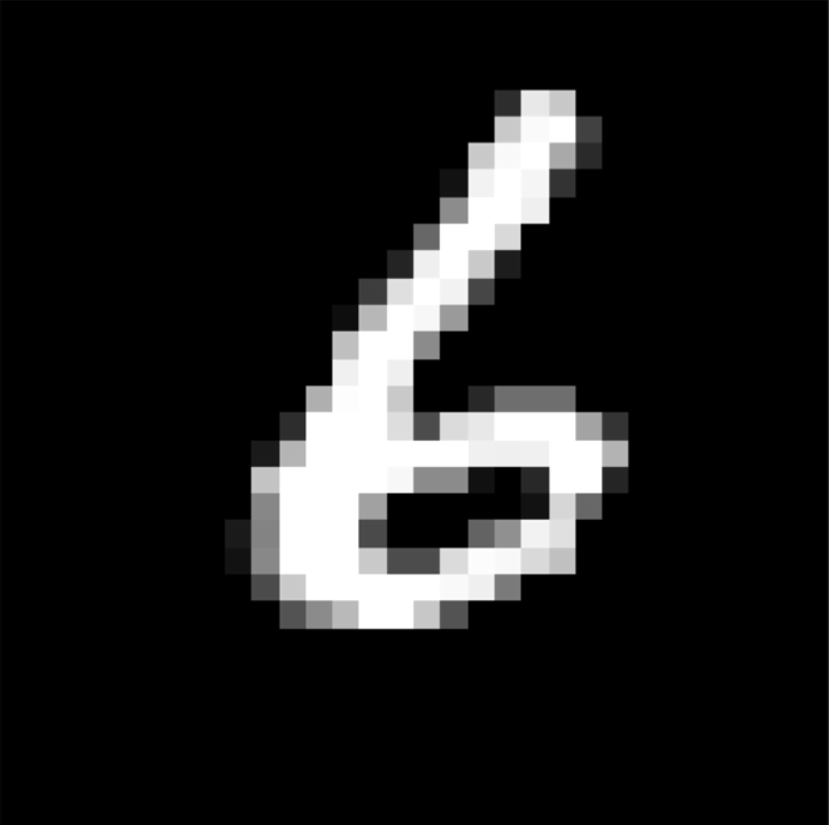

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The predicted digit is :  6


In [50]:
image_data =  input('Enter the path of the image to be predicted :  ')
input_image = cv2.imread(image_data)
cv2_imshow(input_image)
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
img_resize = cv2.resize(grayscale_image,(28,28))
img_resize = img_resize/255
img_reshaped  = np.reshape(img_resize,[1,28,28])
input_prediction = model.predict(img_reshaped)
label_for_first_image = np.argmax(input_prediction)
print('The predicted digit is : ', label_for_first_image)
